In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
csv_file_path = "../data/raw/df_final_demo.txt"
data = pd.read_csv(csv_file_path)

In [4]:
csv_file_path2 = "../data/raw/df_final_experiment_clients.txt"
data2 = pd.read_csv(csv_file_path2)

In [5]:
data.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [6]:
data.shape
# 70609 rows and 9 columns 

(70609, 9)

In [7]:
data.dtypes
# Only the column gender is object 

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [8]:
data2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [9]:
data2.shape

(70609, 2)

In [10]:
data2.dtypes

client_id     int64
Variation    object
dtype: object

In [11]:
df_merge = pd.merge(data, data2, how='inner', on='client_id', left_on=None, right_on=None)

In [12]:
df_merge.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [13]:
df_merge.shape

(70609, 10)

In [14]:
df_merge.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object

In [15]:
# Rename columns
df_merge.columns = ['client_id', 'tenure_year', 'tenure_month', 'age', 'gender',
                   'number_accounts', 'balance', 'calls', 'log_ons', 'variation']
df_merge.columns

Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'gender',
       'number_accounts', 'balance', 'calls', 'log_ons', 'variation'],
      dtype='object')

In [16]:
q75 = df_merge['balance'].quantile(0.75)
filtered_df = df_merge[df_merge['balance'] >= q75]
result = filtered_df['age'].mean()

print(result)

54.5856422460196


In [17]:
q75 = df_merge['balance'].quantile(0.75)
filtered_df = df_merge[df_merge['balance'] >= q75]
result = filtered_df['tenure_year'].mean()

print(result)

14.914442744631424


In [18]:
frequency_table = df_merge['log_ons'].value_counts()

In [19]:
proportion_table = df_merge['log_ons'].value_counts(normalize=True)

In [20]:
frequency_table
proportion_table

log_ons
9.0    0.174942
3.0    0.145095
4.0    0.144769
7.0    0.140137
5.0    0.131086
6.0    0.111594
8.0    0.068135
2.0    0.042623
1.0    0.041618
Name: proportion, dtype: float64

In [21]:
filtered_df = df_merge[(df_merge['log_ons'] == 9.0)]
filtered_df

,client_id,tenure_year,tenure_month,age,gender,number_accounts,balance,calls,log_ons,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0,Control
...,...,...,...,...,...,...,...,...,...,...
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0,Test
50489,6751438,8.0,98.0,49.5,U,2.0,416988.75,6.0,9.0,Test
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,Control
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test


In [22]:
mean_age=filtered_df["age"].mean()
print(mean_age)

47.491133603238865


In [23]:
mean_tenure=filtered_df["tenure_year"].mean()
print(mean_tenure)

12.34421052631579


In [24]:
# Who are the primary clients using this online process? The clientes with more than 9 log ons. 
# Are the primary clients younger or older, new or long-standing A= The clients have an average of 47 years and 12 years as costumers. 

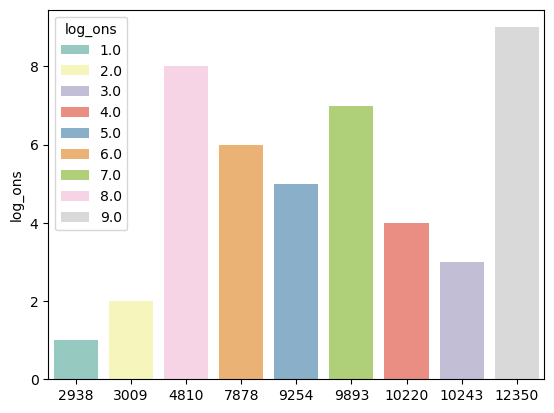

In [25]:
ax=sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3", hue=frequency_table.index, legend='full')
sns.move_legend(ax, "upper left")

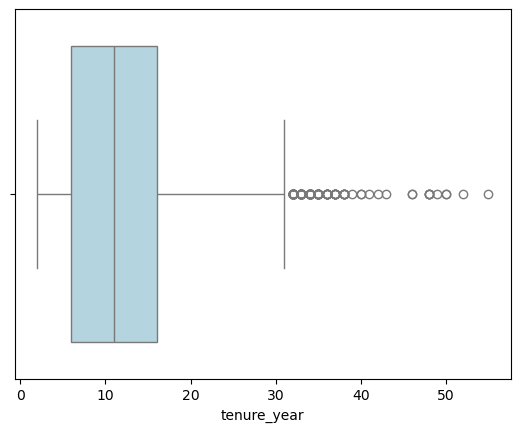

In [26]:
sns.boxplot(x=filtered_df["tenure_year"], color="lightblue");

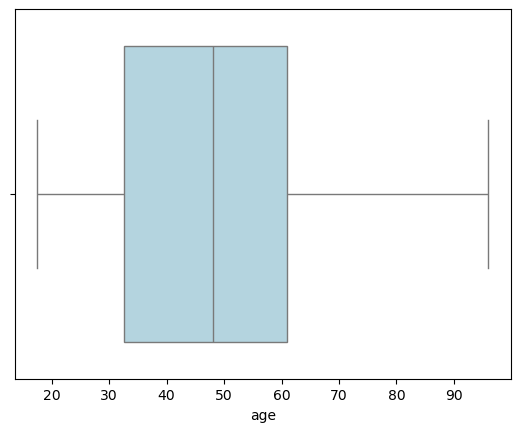

In [27]:
sns.boxplot(x=filtered_df["age"], color="lightblue");

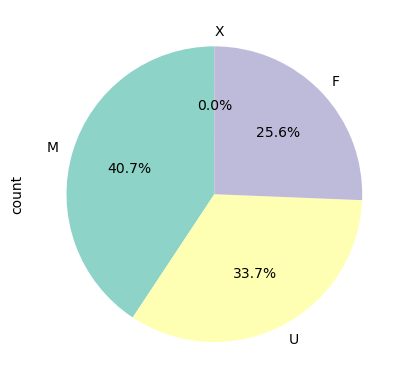

In [28]:
filtered_df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

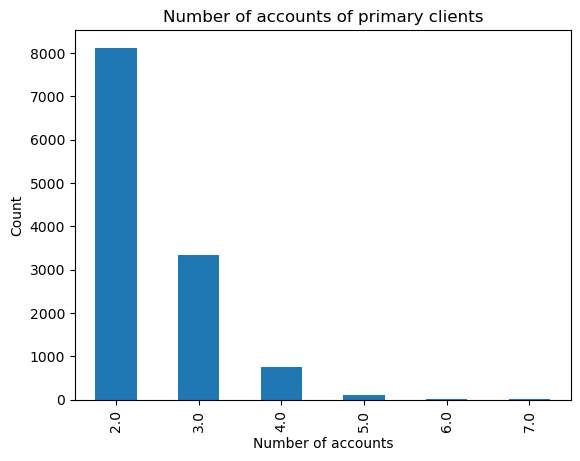

In [64]:
filtered_df['number_accounts'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.xlabel('Number of accounts')
plt.ylabel('Count')
plt.title('Number of accounts of primary clients')

# Show the plot
plt.show()

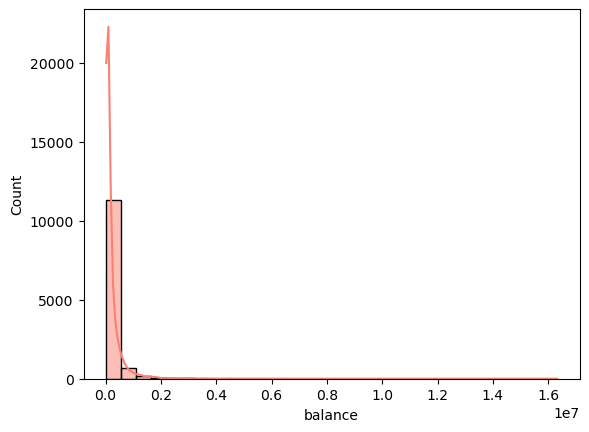

In [77]:
sns.histplot(filtered_df['balance'], kde=True, bins=30, color="salmon");

In [91]:
mean_balance = filtered_df['balance'].mean()
median_balance = filtered_df['balance'].median()
mode_balance = filtered_df['balance'].mode()[0]
variance_balance = filtered_df['balance'].var()
std_dev_balance = filtered_df['balance'].std()
min_balance = filtered_df['balance'].min()
max_balance = filtered_df['balance'].max()
range_balance = max_balance - min_balance
quantiles_balance = filtered_df['balance'].quantile([0.25, 0.5, 0.75])
print(mean_balance)
print(median_balance)
print(mode_balance)
print(variance_balance)
print(std_dev_balance)
print(max_balance)
print(min_balance)
print(range_balance)
print(quantiles_balance)

224476.89673846157
93156.38500000001
25202.85
202076933779.93478
449529.68064404244
16320040.15
23790.019999999997
16296250.13
0.25     50671.0525
0.50     93156.3850
0.75    221101.8200
Name: balance, dtype: float64


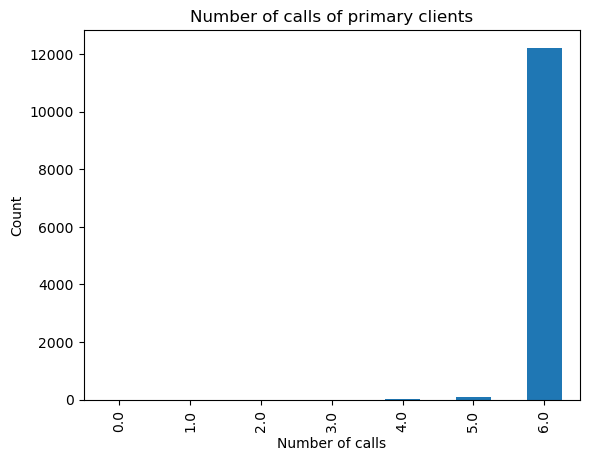

In [97]:
filtered_df['calls'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.xlabel('Number of calls')
plt.ylabel('Count')
plt.title('Number of calls of primary clients')

# Show the plot
plt.show()

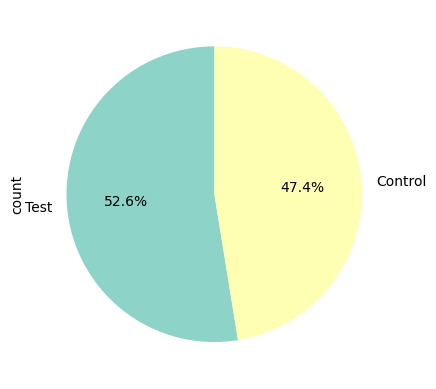

In [99]:
filtered_df['variation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

In [102]:
csv_file_path3 = "../data/clean/df_final_web_data_cleaned.txt"
data3 = pd.read_csv(csv_file_path3)

In [105]:
data3.shape

(744641, 5)

In [111]:
data3.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [113]:
data3.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object